# CS349 Final Project : HAPT

In [19]:
import numpy as np
import pandas as pd

### 1st Step: Import Data

In [20]:
# Data directory
Dir = '../UCI_HAPT_Dataset'

# Helper functions
# Read data
def read_csv(filename):
    '''
    This function reads the .txt file
    Input:
    :param filename: .txt file
    Output:
    :param processed file  
    
    '''
    return pd.read_csv(filename,delim_whitespace=True,header=None)

# Load data
# Load x
def load_x(data):
    filename = f'{Dir}/{data}/X_{data}.txt'
    x = read_csv(filename)
    return x.to_numpy()


# load class labels
def load_y(data):
    filename = f'{Dir}/{data}/y_{data}.txt'
    y = read_csv(filename)[0]
    return y.to_numpy()


def load_data():
    X_train, X_test = load_x('train'), load_x('test')
    y_train, y_test = load_y('train'), load_y('test')
    
    return X_train, X_test, y_train, y_test
        
    

### 2nd Step: Generate Training & Testing Data

In [21]:
X_train, X_test, y_train, y_test = load_data()

In [22]:
train_data = np.concatenate((X_train,np.vstack(y_train)),axis=1)
# print(train_data.shape)
test_data = np.concatenate((X_test,np.vstack(y_test)),axis=1)
# print(test_data.shape)

# randomize dataset
np.random.shuffle(train_data)
np.random.shuffle(test_data)

X_train = train_data[:,:-1]
y_train = train_data[:,-1]

X_test = test_data[:,:-1]
y_test = test_data[:,-1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7767, 561)
(3162, 561)
(7767,)
(3162,)


In [23]:
# Let's use Linear discriminant analysis to find features that classifies the label well
# Importing libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [24]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [25]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (7767, 11)
y_train: (7767,)
X_test: (3162, 11)
y_test: (3162,)


### 3rd step: Generate all helper functions

In [26]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix,classification_report
import itertools
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [27]:
# Helper function for run models 
def run_model(model,X_train,y_train,X_test,y_test):
    results = {'training_time':[],
               'testing_time':[],
               'predictions':[],
               'Accuracy': []}
    
    # fit model & calculate training time
    train_start_time = time.time()
    model.fit(X_train,y_train)
    train_end_time = time.time()
    train_duaration = train_end_time - train_start_time
    results['training_time'].append(train_duaration)
    
    # perdict labels & calculate testing time
    test_start_time = time.time()
    y_prediction = model.predict(X_test)
    results['predictions'].append(y_prediction)
    test_end_time = time.time()
    test_duration = test_end_time - test_start_time
    results['testing_time'].append(test_duration)
    
    # Calculate the accuracy of the model
    acc = accuracy_score(y_true=y_test, y_pred=y_prediction)
    results['Accuracy'].append(acc)
    
    # Add trained model to results
    results['model'] = model
    
    return results


# Helper function for confusion matrix
def plot_confusion_mat(y_test,y_pred,classes,normalize=False):
    
    confusion_mat = confusion_matrix(y_test,y_pred)
    # plot confusion matrix
    
    if normalize:
        confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:,np.newaxis]

    plt.figure(figsize=(10,10))
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Reds)
    plt.title('Confusion_Matrix')
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = confusion_mat.max() / 2.
    for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
        plt.text(j,i,format(confusion_mat[i,j],fmt),horizontalalignment='center', \
                 color='white' if confusion_mat[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('Actual_label')
    plt.xlabel('Predicted_label')
    
    plt.show()


# Helper function for report
def model_report(model,y_test,y_pred):
    print(f'Best estimator: {model.best_estimator_}')
    print(f'Best parameters: {model.best_params_}')
    print(f'Best index: {model.best_index_}')
    print(f'Best score: {model.best_score_}')
    print('\n')
    
    print('Classification report')
    print('\n')
    report = classification_report(y_test,y_pred,target_names=Labels)
    print(report)
    

### 4th Step. Test models

### 1. Logistic Regression

In [28]:
# Labels
Labels = ['WALKING', 
          'WALKING_UPSTAIRS', 
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING',
          'STAND_TO_SIT',      
          'SIT_TO_STAND',      
          'SIT_TO_LIE',
          'LIE_TO_SIT',
          'STAND_TO_LIE',      
          'LIE_TO_STAND']

# Hyperparameters
params = {'C':[10,15,20,25,30,35,40],'penalty':['l1','l2']}

# Initialize model
log_reg_model = linear_model.LogisticRegression(solver='lbfgs',max_iter=2000)
log_reg_model_grid = GridSearchCV(log_reg_model,
                                  param_grid=params,
                                  verbose=1,
                                  n_jobs=-1)

log_reg_model_grid_results = run_model(log_reg_model_grid,
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)



Fitting 5 folds for each of 14 candidates, totalling 70 fits


/home/dinvincible98/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.98055973        nan 0.98030225        nan 0.97991607
        nan 0.98004468        nan 0.98004477        nan 0.98017355
        nan 0.97978728]
  warnings.warn(
/home/dinvincible98/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print('Training time: '+ str(log_reg_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(log_reg_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(log_reg_model_grid_results['Accuracy'][0]))


Training time: 73.81243133544922 s


Testing time: 0.0006737709045410156 s


Accuracy: 0.9497153700189753


In [30]:
y_predictions = log_reg_model_grid_results['predictions'][0]

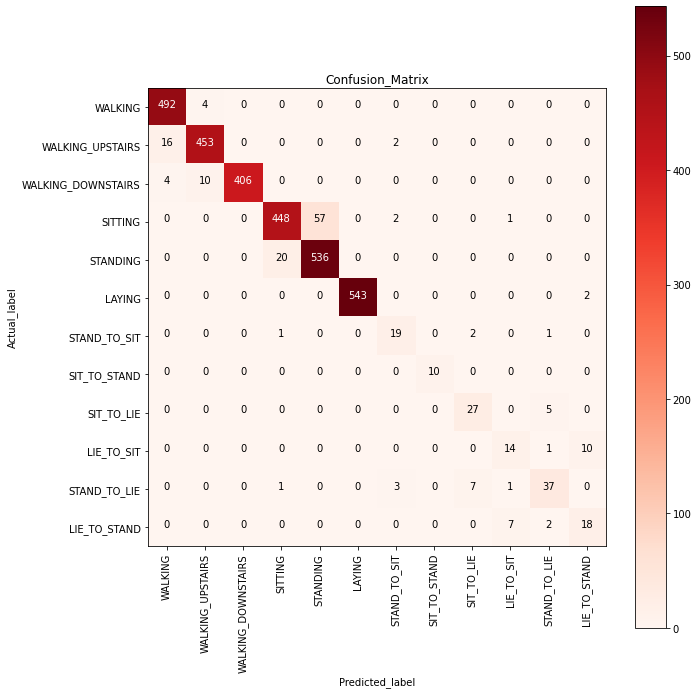

In [31]:
# plot confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels)

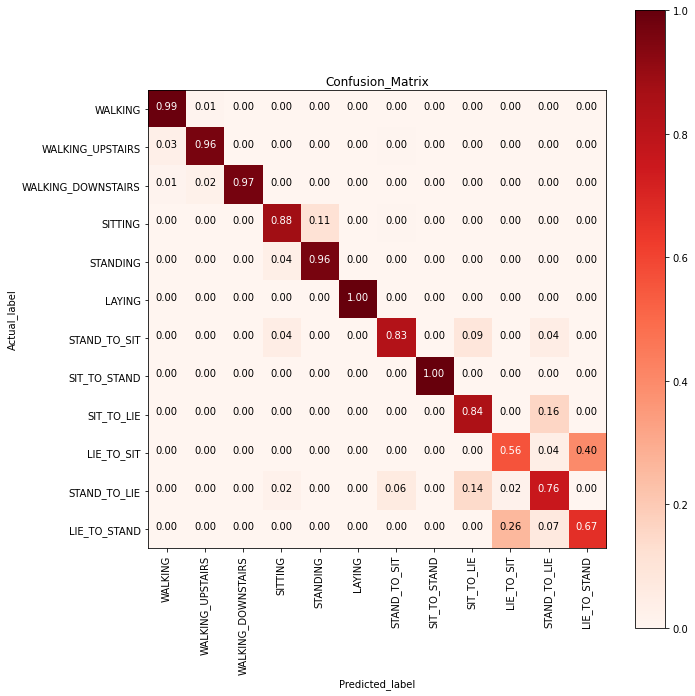

In [32]:
# plot normalized confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels, normalize=True)

In [33]:
model_report(log_reg_model_grid_results['model'],y_test,y_predictions)

Best estimator: LogisticRegression(C=10, max_iter=2000)
Best parameters: {'C': 10, 'penalty': 'l2'}
Best index: 1
Best score: 0.9805597336827215


Classification report


                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.98       496
  WALKING_UPSTAIRS       0.97      0.96      0.97       471
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
           SITTING       0.95      0.88      0.92       508
          STANDING       0.90      0.96      0.93       556
            LAYING       1.00      1.00      1.00       545
      STAND_TO_SIT       0.73      0.83      0.78        23
      SIT_TO_STAND       1.00      1.00      1.00        10
        SIT_TO_LIE       0.75      0.84      0.79        32
        LIE_TO_SIT       0.61      0.56      0.58        25
      STAND_TO_LIE       0.80      0.76      0.78        49
      LIE_TO_STAND       0.60      0.67      0.63        27

          accuracy                           0.

### 2. SGD

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
# Hyperparameters
params = {'loss':['hinge','squared_hinge'],'alpha':[0.00001,0.0001,0.001,0.01],'penalty':['l1','l2'],'max_iter':[1000]}

# Initialize model

sgd_model = SGDClassifier()
# sgd_model.get_params().keys()
sgd_model_grid = GridSearchCV(sgd_model,
                              param_grid=params,
                              verbose=1,
                              n_jobs=-1)

sgd_model_grid_results = run_model(sgd_model_grid,
                                       X_train,
                                       y_train,
                                       X_test,
                                       y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [36]:
print('Training time: '+ str(sgd_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(sgd_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(sgd_model_grid_results['Accuracy'][0]))

Training time: 14.93630075454712 s


Testing time: 0.00042176246643066406 s


Accuracy: 0.9506641366223909


In [37]:
y_predictions = sgd_model_grid_results['predictions'][0]

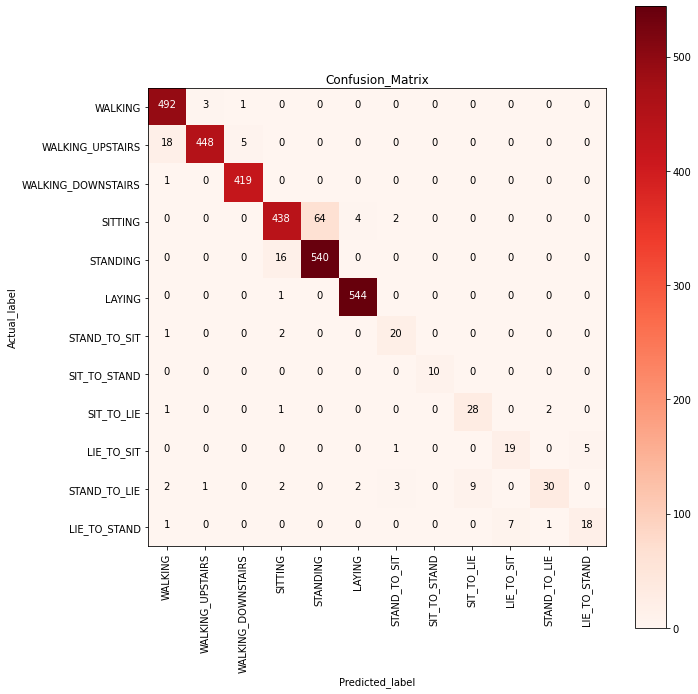

In [38]:
# plot confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels)

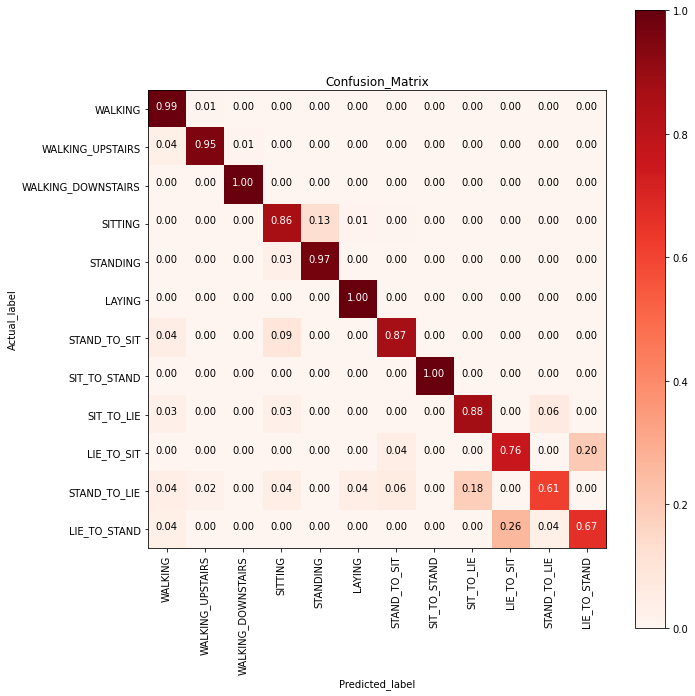

In [39]:
# plot normalized confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels, normalize=True)

In [40]:
model_report(sgd_model_grid_results['model'],y_test,y_predictions)

Best estimator: SGDClassifier()
Best parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
Best index: 5
Best score: 0.9815893347123226


Classification report


                    precision    recall  f1-score   support

           WALKING       0.95      0.99      0.97       496
  WALKING_UPSTAIRS       0.99      0.95      0.97       471
WALKING_DOWNSTAIRS       0.99      1.00      0.99       420
           SITTING       0.95      0.86      0.90       508
          STANDING       0.89      0.97      0.93       556
            LAYING       0.99      1.00      0.99       545
      STAND_TO_SIT       0.77      0.87      0.82        23
      SIT_TO_STAND       1.00      1.00      1.00        10
        SIT_TO_LIE       0.76      0.88      0.81        32
        LIE_TO_SIT       0.73      0.76      0.75        25
      STAND_TO_LIE       0.91      0.61      0.73        49
      LIE_TO_STAND       0.78      0.67      0.72        27

          accuracy          

### 3. Kernal SVM

In [41]:
from sklearn.svm import SVC

In [42]:
# Hyperparameters
params = {'C':[0.125,0.25,0.5,1.0], 'gamma':[0.001,0.01,0.1,1]}

# Initialize the model
rbf_svc_model = SVC(kernel='rbf')
rbf_svc_model_grid = GridSearchCV(rbf_svc_model,param_grid=params)
rbf_svc_model_grid_results = run_model(rbf_svc_model_grid,
                                 X_train,
                                 y_train,
                                 X_test,
                                 y_test)


In [43]:
print('Training time: '+ str(rbf_svc_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(rbf_svc_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(rbf_svc_model_grid_results['Accuracy'][0]))

Training time: 87.02061009407043 s


Testing time: 0.11986207962036133 s


Accuracy: 0.9531941808981658


In [44]:
y_predictions = rbf_svc_model_grid_results['predictions'][0]

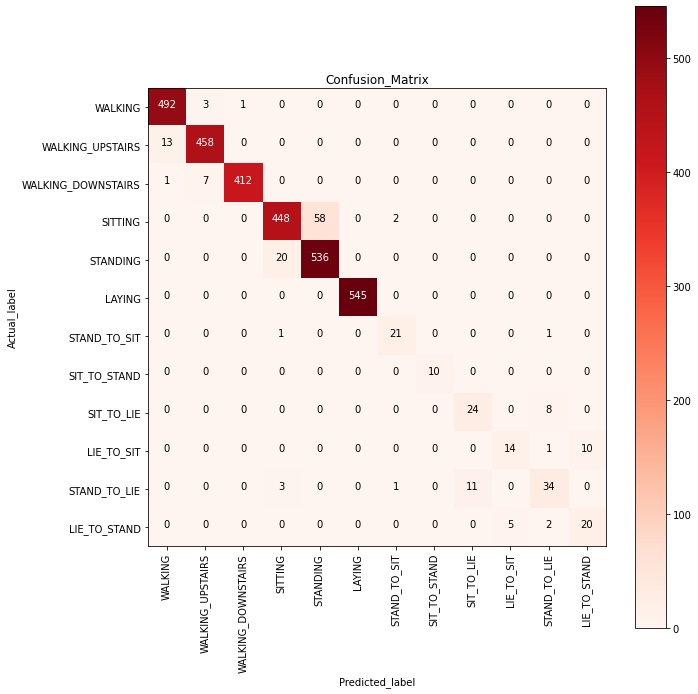

In [45]:
# plot confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels)

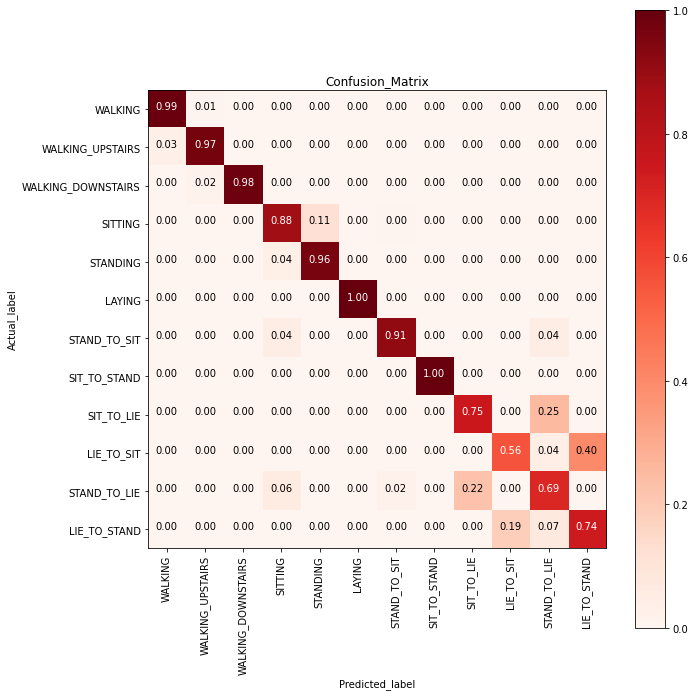

In [46]:
# plot normalized confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels, normalize=True)

In [47]:
# Model report

model_report(rbf_svc_model_grid_results['model'],y_test,y_predictions)

Best estimator: SVC(C=0.5, gamma=0.01)
Best parameters: {'C': 0.5, 'gamma': 0.01}
Best index: 9
Best score: 0.9822333325874858


Classification report


                    precision    recall  f1-score   support

           WALKING       0.97      0.99      0.98       496
  WALKING_UPSTAIRS       0.98      0.97      0.98       471
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
           SITTING       0.95      0.88      0.91       508
          STANDING       0.90      0.96      0.93       556
            LAYING       1.00      1.00      1.00       545
      STAND_TO_SIT       0.88      0.91      0.89        23
      SIT_TO_STAND       1.00      1.00      1.00        10
        SIT_TO_LIE       0.69      0.75      0.72        32
        LIE_TO_SIT       0.74      0.56      0.64        25
      STAND_TO_LIE       0.74      0.69      0.72        49
      LIE_TO_STAND       0.67      0.74      0.70        27

          accuracy                           0.95      3162
     

###  4. Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
params = {'max_depth':np.arange(2,10,1)}

# Initialize the model
d_tree_model = DecisionTreeClassifier()
d_tree_model_grid = GridSearchCV(d_tree_model,param_grid=params,verbose=1,n_jobs=-1)
d_tree_model_grid_results = run_model(d_tree_model_grid,  
                                      X_train,
                                      y_train,
                                      X_test,
                                      y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [50]:
print('Training time: '+ str(d_tree_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(d_tree_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(d_tree_model_grid_results['Accuracy'][0]))

Training time: 0.36960506439208984 s


Testing time: 0.00036716461181640625 s


Accuracy: 0.9304237824161923


In [51]:
y_predictions = d_tree_model_grid_results['predictions'][0]

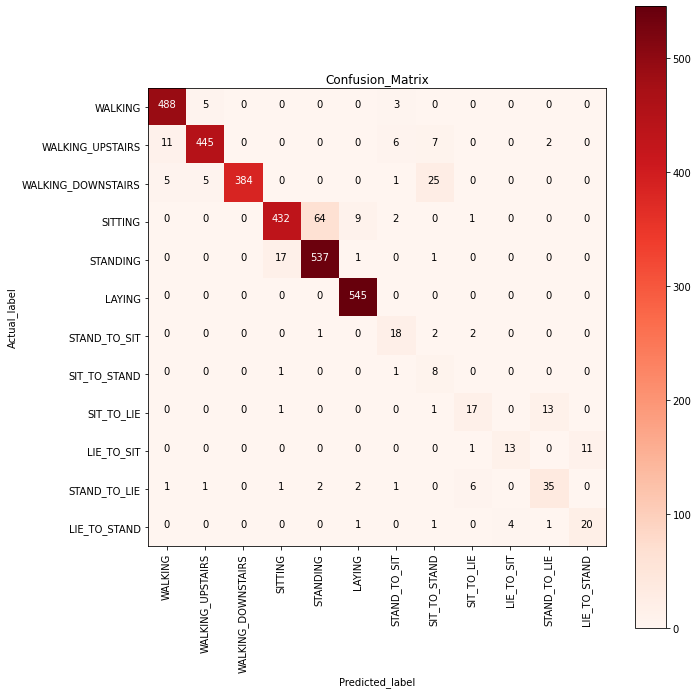

In [52]:
# plot confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels)

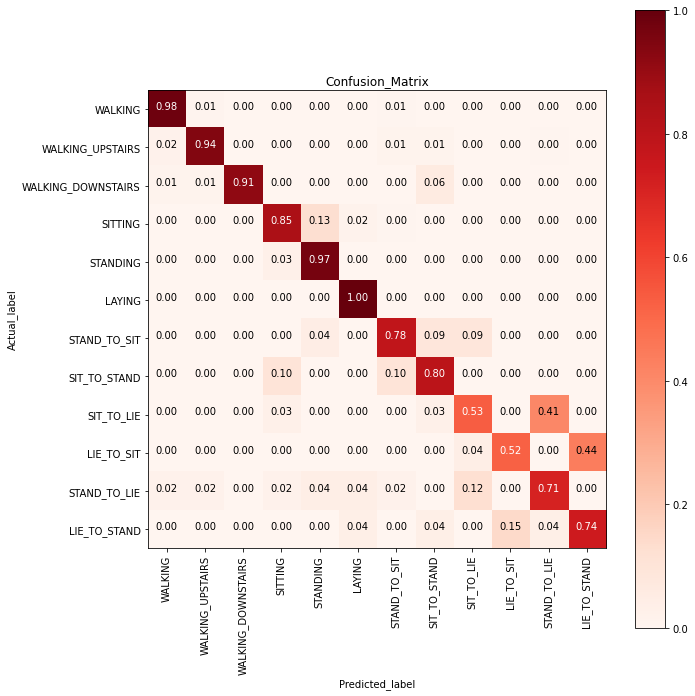

In [53]:
# plot normalized confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels, normalize=True)

In [54]:
model_report(d_tree_model_grid_results['model'],y_test,y_predictions)

Best estimator: DecisionTreeClassifier(max_depth=8)
Best parameters: {'max_depth': 8}
Best index: 6
Best score: 0.974894524733546


Classification report


                    precision    recall  f1-score   support

           WALKING       0.97      0.98      0.98       496
  WALKING_UPSTAIRS       0.98      0.94      0.96       471
WALKING_DOWNSTAIRS       1.00      0.91      0.96       420
           SITTING       0.96      0.85      0.90       508
          STANDING       0.89      0.97      0.93       556
            LAYING       0.98      1.00      0.99       545
      STAND_TO_SIT       0.56      0.78      0.65        23
      SIT_TO_STAND       0.18      0.80      0.29        10
        SIT_TO_LIE       0.63      0.53      0.58        32
        LIE_TO_SIT       0.76      0.52      0.62        25
      STAND_TO_LIE       0.69      0.71      0.70        49
      LIE_TO_STAND       0.65      0.74      0.69        27

          accuracy                           0.93      3162
  

### 5. Multi-layer Perceptron (MLP) 

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
# Hyperparameters
params = {'alpha':[0.00001,0.0001,0.001,0.01],
          'solver':['lbfgs','adam'],
          'max_iter':[2000]}

# Initialze model
MLP_model = MLPClassifier()
# MLP_model.get_params().items()
MLP_model_grid = GridSearchCV(MLP_model,
                              param_grid=params,
                              verbose=1,
                              n_jobs=-1)
MLP_model_grid_results = run_model(MLP_model_grid,
                                   X_train,
                                   y_train,
                                   X_test,
                                   y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [57]:
print('Training time: '+ str(MLP_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(MLP_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(MLP_model_grid_results['Accuracy'][0]))

Training time: 127.98294520378113 s


Testing time: 0.003544330596923828 s


Accuracy: 0.9459203036053131


In [58]:
y_predictions = MLP_model_grid_results['predictions'][0]

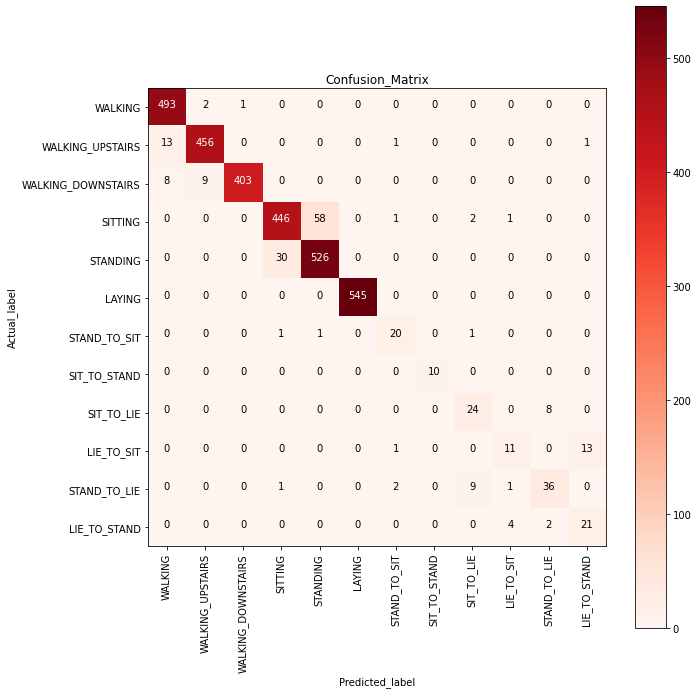

In [59]:
# plot confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels)

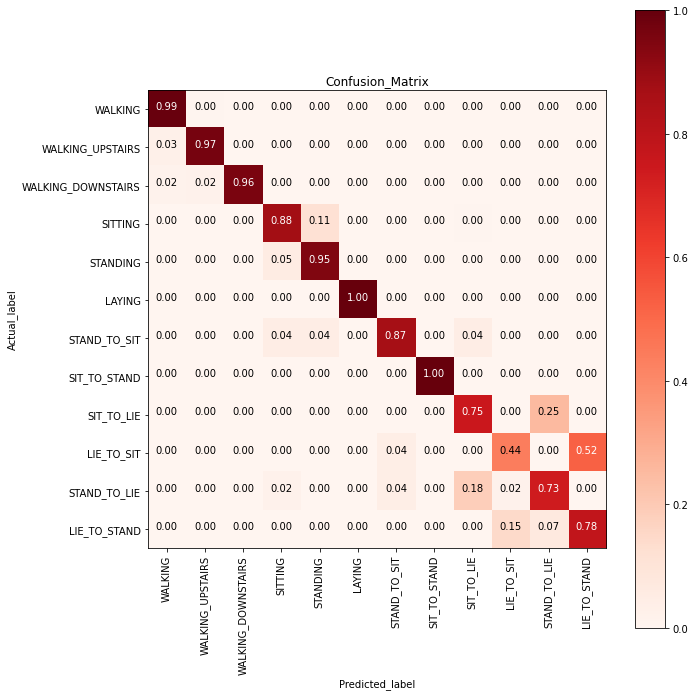

In [60]:
# plot normalized confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels, normalize=True)

In [61]:
model_report(MLP_model_grid_results['model'],y_test,y_predictions)

Best estimator: MLPClassifier(alpha=0.01, max_iter=2000)
Best parameters: {'alpha': 0.01, 'max_iter': 2000, 'solver': 'adam'}
Best index: 7
Best score: 0.9804303705784709


Classification report


                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.98       496
  WALKING_UPSTAIRS       0.98      0.97      0.97       471
WALKING_DOWNSTAIRS       1.00      0.96      0.98       420
           SITTING       0.93      0.88      0.90       508
          STANDING       0.90      0.95      0.92       556
            LAYING       1.00      1.00      1.00       545
      STAND_TO_SIT       0.80      0.87      0.83        23
      SIT_TO_STAND       1.00      1.00      1.00        10
        SIT_TO_LIE       0.67      0.75      0.71        32
        LIE_TO_SIT       0.65      0.44      0.52        25
      STAND_TO_LIE       0.78      0.73      0.76        49
      LIE_TO_STAND       0.60      0.78      0.68        27

          accuracy   

### 6.KNN 

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# Hyperparameter
params = {'n_neighbors':[10,15,20,25,30]}

# Initialize the model
Knn_model = KNeighborsClassifier()
#Knn_model.get_params().items()
Knn_model_grid = GridSearchCV(Knn_model,param_grid=params,verbose=1,n_jobs=-1)
Knn_model_grid_results = run_model(Knn_model_grid, X_train,y_train,X_test,y_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [64]:
print('Training time: '+ str(Knn_model_grid_results['training_time'][0]) + ' s')
print('\n')
print('Testing time: '+ str(Knn_model_grid_results['testing_time'][0]) + ' s')
print('\n')
print('Accuracy: ' + str(Knn_model_grid_results['Accuracy'][0]))

Training time: 0.5533597469329834 s


Testing time: 0.22492122650146484 s


Accuracy: 0.9535104364326376


In [65]:
y_predictions = Knn_model_grid_results['predictions'][0]

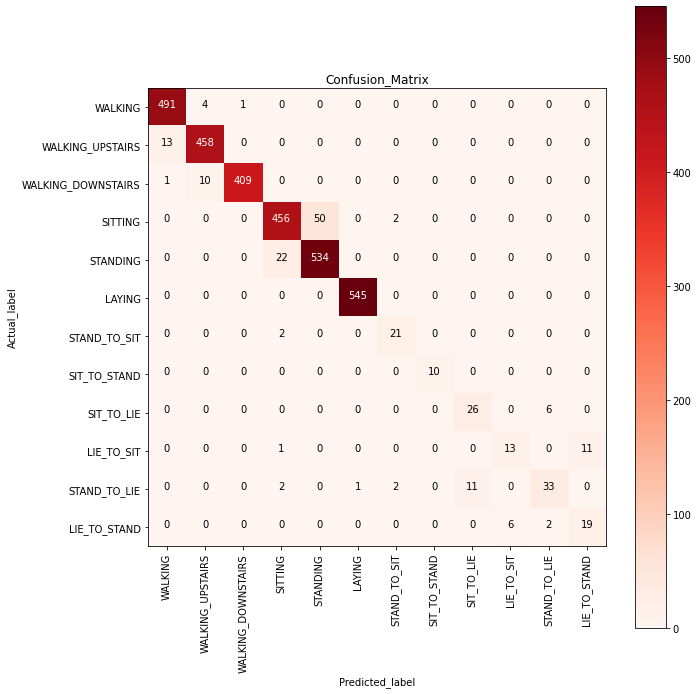

In [66]:
# plot confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels)

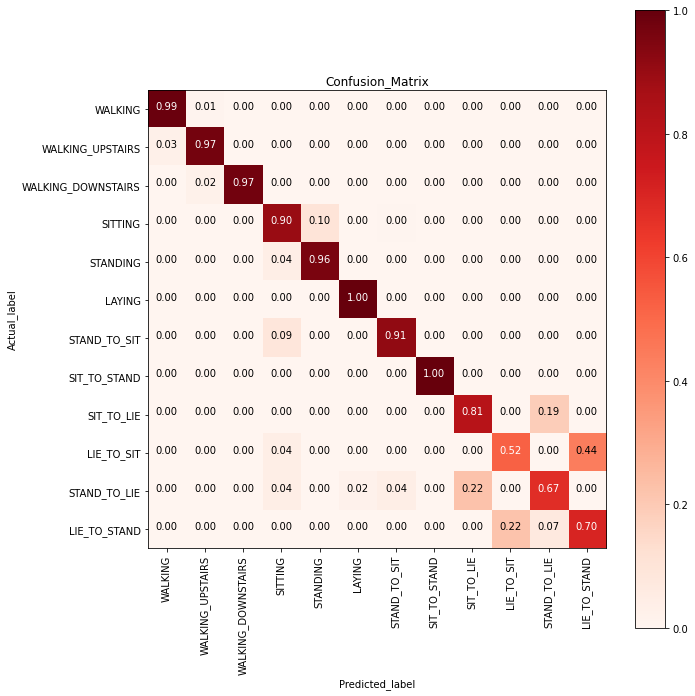

In [67]:
# plot normalized confusion matrix
plot_confusion_mat(y_test,y_predictions,classes=Labels, normalize=True)

In [68]:
model_report(Knn_model_grid_results['model'],y_test,y_predictions)

Best estimator: KNeighborsClassifier(n_neighbors=10)
Best parameters: {'n_neighbors': 10}
Best index: 0
Best score: 0.9826193501016425


Classification report


                    precision    recall  f1-score   support

           WALKING       0.97      0.99      0.98       496
  WALKING_UPSTAIRS       0.97      0.97      0.97       471
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
           SITTING       0.94      0.90      0.92       508
          STANDING       0.91      0.96      0.94       556
            LAYING       1.00      1.00      1.00       545
      STAND_TO_SIT       0.84      0.91      0.87        23
      SIT_TO_STAND       1.00      1.00      1.00        10
        SIT_TO_LIE       0.70      0.81      0.75        32
        LIE_TO_SIT       0.68      0.52      0.59        25
      STAND_TO_LIE       0.80      0.67      0.73        49
      LIE_TO_STAND       0.63      0.70      0.67        27

          accuracy                           0.95      31